In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

'''
Import note: The classroom currently uses sklearn version 0.19.
If you need to use an imputer, it is available in sklearn.preprocessing.Imputer,
instead of sklearn.impute as in newer versions of sklearn.
'''

'\nImport note: The classroom currently uses sklearn version 0.19.\nIf you need to use an imputer, it is available in sklearn.preprocessing.Imputer,\ninstead of sklearn.impute as in newer versions of sklearn.\n'

### Step 0: Load the Data

There are four files associated with this project (not including this one):

- `Udacity_AZDIAS_Subset.csv`: Demographics data for the general population of Germany; 891211 persons (rows) x 85 features (columns).
- `Udacity_CUSTOMERS_Subset.csv`: Demographics data for customers of a mail-order company; 191652 persons (rows) x 85 features (columns).
- `Data_Dictionary.md`: Detailed information file about the features in the provided datasets.
- `AZDIAS_Feature_Summary.csv`: Summary of feature attributes for demographics data; 85 features (rows) x 4 columns

Each row of the demographics files represents a single person, but also includes information outside of individuals, including information about their household, building, and neighborhood. You will use this information to cluster the general population into groups with similar demographic properties. Then, you will see how the people in the customers dataset fit into those created clusters. The hope here is that certain clusters are over-represented in the customers data, as compared to the general population; those over-represented clusters will be assumed to be part of the core userbase. This information can then be used for further applications, such as targeting for a marketing campaign.

To start off with, load in the demographics data for the general population into a pandas DataFrame, and do the same for the feature attributes summary. Note for all of the `.csv` data files in this project: they're semicolon (`;`) delimited, so you'll need an additional argument in your [`read_csv()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) call to read in the data properly. Also, considering the size of the main dataset, it may take some time for it to load completely.

Once the dataset is loaded, it's recommended that you take a little bit of time just browsing the general structure of the dataset and feature summary file. You'll be getting deep into the innards of the cleaning in the first major step of the project, so gaining some general familiarity can help you get your bearings.

In [2]:
# Load in the general demographics data.
azdias = pd.read_csv('Udacity_AZDIAS_Subset.csv', sep = ';')

# Load in the feature summary file.
feat_info = pd.read_csv('AZDIAS_Feature_Summary.csv', sep = ';')

In [3]:
display(azdias)

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,-1,2,1,2.0,3,4,3,5,5,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-1,1,2,5.0,1,5,2,5,4,5,...,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0
2,-1,3,2,3.0,1,4,1,2,3,5,...,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0
3,2,4,2,2.0,4,2,5,2,1,2,...,2.0,2.0,2.0,0.0,1.0,3.0,4.0,2.0,3.0,3.0
4,-1,3,1,5.0,4,3,4,1,3,2,...,2.0,4.0,2.0,1.0,2.0,3.0,3.0,4.0,6.0,5.0
5,3,1,2,2.0,3,1,5,2,2,5,...,2.0,3.0,1.0,1.0,1.0,5.0,5.0,2.0,3.0,3.0
6,-1,2,2,5.0,1,5,1,5,4,3,...,3.0,3.0,1.0,0.0,1.0,5.0,5.0,4.0,6.0,3.0
7,-1,1,1,3.0,3,3,4,1,3,2,...,3.0,3.0,1.0,0.0,1.0,4.0,4.0,2.0,5.0,2.0
8,-1,3,1,3.0,4,4,2,4,2,2,...,2.0,3.0,2.0,1.0,1.0,3.0,3.0,2.0,4.0,3.0
9,-1,3,2,4.0,2,4,2,3,5,4,...,2.0,3.0,2.0,1.0,1.0,3.0,3.0,2.0,3.0,1.0


In [4]:
# Check the structure of the data after it's loaded (e.g. print the number of
# rows and columns, print the first few rows).

azdias.head()

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,-1,2,1,2.0,3,4,3,5,5,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-1,1,2,5.0,1,5,2,5,4,5,...,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0
2,-1,3,2,3.0,1,4,1,2,3,5,...,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0
3,2,4,2,2.0,4,2,5,2,1,2,...,2.0,2.0,2.0,0.0,1.0,3.0,4.0,2.0,3.0,3.0
4,-1,3,1,5.0,4,3,4,1,3,2,...,2.0,4.0,2.0,1.0,2.0,3.0,3.0,4.0,6.0,5.0


In [5]:
azdias.shape

(891221, 85)

In [6]:
feat_info.head()

,attribute,information_level,type,missing_or_unknown
0,AGER_TYP,person,categorical,"[-1,0]"
1,ALTERSKATEGORIE_GROB,person,ordinal,"[-1,0,9]"
2,ANREDE_KZ,person,categorical,"[-1,0]"
3,CJT_GESAMTTYP,person,categorical,[0]
4,FINANZ_MINIMALIST,person,ordinal,[-1]


In [7]:
display(feat_info.describe())
cols = feat_info['attribute'].values

,attribute,information_level,type,missing_or_unknown
count,85,85,85,85
unique,85,9,5,9
top,PLZ8_ANTG4,person,ordinal,[-1]
freq,1,43,49,26


## Step 1: Preprocessing

### Step 1.1: Assess Missing Data

The feature summary file contains a summary of properties for each demographics data column. You will use this file to help you make cleaning decisions during this stage of the project. First of all, you should assess the demographics data in terms of missing data. Pay attention to the following points as you perform your analysis, and take notes on what you observe. Make sure that you fill in the **Discussion** cell with your findings and decisions at the end of each step that has one!

#### Step 1.1.1: Convert Missing Value Codes to NaNs
The fourth column of the feature attributes summary (loaded in above as `feat_info`) documents the codes from the data dictionary that indicate missing or unknown data. While the file encodes this as a list (e.g. `[-1,0]`), this will get read in as a string object. You'll need to do a little bit of parsing to make use of it to identify and clean the data. Convert data that matches a 'missing' or 'unknown' value code into a numpy NaN value. You might want to see how much data takes on a 'missing' or 'unknown' code, and how much data is naturally missing, as a point of interest.


In [8]:
display(azdias.isnull().sum())
display(azdias.isnull().sum().sum())

AGER_TYP                      0
ALTERSKATEGORIE_GROB          0
ANREDE_KZ                     0
CJT_GESAMTTYP              4854
FINANZ_MINIMALIST             0
FINANZ_SPARER                 0
FINANZ_VORSORGER              0
FINANZ_ANLEGER                0
FINANZ_UNAUFFAELLIGER         0
FINANZ_HAUSBAUER              0
FINANZTYP                     0
GEBURTSJAHR                   0
GFK_URLAUBERTYP            4854
GREEN_AVANTGARDE              0
HEALTH_TYP                    0
LP_LEBENSPHASE_FEIN        4854
LP_LEBENSPHASE_GROB        4854
LP_FAMILIE_FEIN            4854
LP_FAMILIE_GROB            4854
LP_STATUS_FEIN             4854
LP_STATUS_GROB             4854
NATIONALITAET_KZ              0
PRAEGENDE_JUGENDJAHRE         0
RETOURTYP_BK_S             4854
SEMIO_SOZ                     0
SEMIO_FAM                     0
SEMIO_REL                     0
SEMIO_MAT                     0
SEMIO_VERT                    0
SEMIO_LUST                    0
                          ...  
OST_WEST

4896838

In [9]:
for i in range(len(feat_info)):
    missing = feat_info.iloc[i]['missing_or_unknown']
    missing = missing.strip(']')
    missing = missing.strip('[')
    missing = missing.split(sep = ',')
    missing = [int(v) if (v != '' and v != 'XX' and v != 'X') else v for v in missing]
    if missing != ['']: azdias = azdias.replace({feat_info.iloc[i]['attribute']: missing}, np.nan)

display(azdias)

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,NaN,2.0,1,2.0,3,4,3,5,5,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1.0,2,5.0,1,5,2,5,4,5,...,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0
2,NaN,3.0,2,3.0,1,4,1,2,3,5,...,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0
3,2.0,4.0,2,2.0,4,2,5,2,1,2,...,2.0,2.0,2.0,0.0,1.0,3.0,4.0,2.0,3.0,3.0
4,NaN,3.0,1,5.0,4,3,4,1,3,2,...,2.0,4.0,2.0,1.0,2.0,3.0,3.0,4.0,6.0,5.0
5,3.0,1.0,2,2.0,3,1,5,2,2,5,...,2.0,3.0,1.0,1.0,1.0,5.0,5.0,2.0,3.0,3.0
6,NaN,2.0,2,5.0,1,5,1,5,4,3,...,3.0,3.0,1.0,0.0,1.0,5.0,5.0,4.0,6.0,3.0
7,NaN,1.0,1,3.0,3,3,4,1,3,2,...,3.0,3.0,1.0,0.0,1.0,4.0,4.0,2.0,5.0,2.0
8,NaN,3.0,1,3.0,4,4,2,4,2,2,...,2.0,3.0,2.0,1.0,1.0,3.0,3.0,2.0,4.0,3.0
9,NaN,3.0,2,4.0,2,4,2,3,5,4,...,2.0,3.0,2.0,1.0,1.0,3.0,3.0,2.0,3.0,1.0


In [10]:
print(azdias['AGER_TYP'].sum())

358058.0


#### Step 1.1.2: Assess Missing Data in Each Column

How much missing data is present in each column? There are a few columns that are outliers in terms of the proportion of values that are missing. You will want to use matplotlib's [`hist()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html) function to visualize the distribution of missing value counts to find these columns. Identify and document these columns. While some of these columns might have justifications for keeping or re-encoding the data, for this project you should just remove them from the dataframe. (Feel free to make remarks about these outlier columns in the discussion, however!)

For the remaining features, are there any patterns in which columns have, or share, missing data?

In [11]:
# Perform an assessment of how much missing data there is in each column of the
# dataset.

missing_percentage_in_cols = (azdias.isnull().sum() / len(azdias)) * 100
display(missing_percentage_in_cols.sort_values(ascending = False))

TITEL_KZ                 99.757636
AGER_TYP                 76.955435
KK_KUNDENTYP             65.596749
KBA05_BAUMAX             53.468668
GEBURTSJAHR              44.020282
ALTER_HH                 34.813699
REGIOTYP                 17.735668
KKK                      17.735668
W_KEIT_KIND_HH           16.605084
KBA05_ANTG4              14.959701
KBA05_GBZ                14.959701
MOBI_REGIO               14.959701
KBA05_ANTG1              14.959701
KBA05_ANTG2              14.959701
KBA05_ANTG3              14.959701
PLZ8_GBZ                 13.073637
PLZ8_HHZ                 13.073637
PLZ8_BAUMAX              13.073637
PLZ8_ANTG4               13.073637
PLZ8_ANTG1               13.073637
PLZ8_ANTG3               13.073637
PLZ8_ANTG2               13.073637
SHOPPER_TYP              12.476816
VERS_TYP                 12.476816
HEALTH_TYP               12.476816
NATIONALITAET_KZ         12.153551
PRAEGENDE_JUGENDJAHRE    12.136608
KBA13_ANZAHL_PKW         11.871354
ANZ_HAUSHALTE_AKTIV 

Text(0,0.5,'percentage of missing values.')

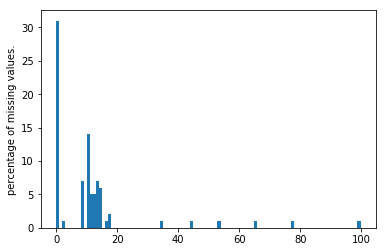

In [12]:
# Investigate patterns in the amount of missing data in each column.
plt.hist(missing_percentage_in_cols, bins = 100)
plt.ylabel('percentage of missing values.')

In [13]:
# Remove the outlier columns from the dataset. (You'll perform other data
# engineering tasks such as re-encoding and imputation later.)

missing_percentage_in_cols_20 = missing_percentage_in_cols[missing_percentage_in_cols > 20.0]
missing_percentage_in_cols_10 = missing_percentage_in_cols[missing_percentage_in_cols > 10.0]

print(missing_percentage_in_cols_20)

AGER_TYP        76.955435
GEBURTSJAHR     44.020282
TITEL_KZ        99.757636
ALTER_HH        34.813699
KK_KUNDENTYP    65.596749
KBA05_BAUMAX    53.468668
dtype: float64


In [14]:
cols_to_drop = missing_percentage_in_cols_20.index.tolist()
display(cols_to_drop)

['AGER_TYP',
 'GEBURTSJAHR',
 'TITEL_KZ',
 'ALTER_HH',
 'KK_KUNDENTYP',
 'KBA05_BAUMAX']

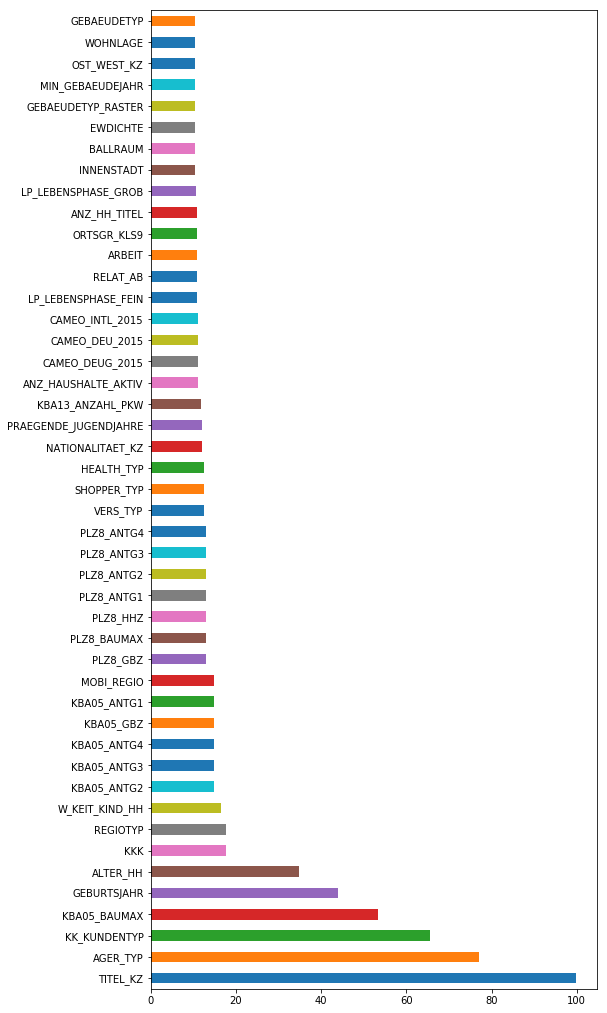

In [15]:
missing_percentage_in_cols_10.sort_values(ascending = False).plot(kind = 'barh', figsize = (8, 18))

In [16]:
adzias = azdias.drop(cols_to_drop, axis = 1)
adzias.shape

(891221, 79)

In [17]:
adzias.head()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,FINANZTYP,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,2.0,1,2.0,3,4,3,5,5,3,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,2,5.0,1,5,2,5,4,5,1,...,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0
2,3.0,2,3.0,1,4,1,2,3,5,1,...,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0
3,4.0,2,2.0,4,2,5,2,1,2,6,...,2.0,2.0,2.0,0.0,1.0,3.0,4.0,2.0,3.0,3.0
4,3.0,1,5.0,4,3,4,1,3,2,5,...,2.0,4.0,2.0,1.0,2.0,3.0,3.0,4.0,6.0,5.0


#### Discussion 1.1.2: Assess Missing Data in Each Column

Around 90% of the columns have less than 20% of missing values, those are dropped because they don't contribute much to the data.
The following columns are dropped from the data.
AGER_TYP
GEBURTSJAHR
GREEN_AVANTGARDE
TITEL_KZ
ALTER_HH
ANZ_TITEL
KK_KUNDENTYP
ANZ_HH_TITEL
KBA05_BAUMAX

Also, if we look at the data missing in the columns with more than 10% missing values, it will become apparent than some of the columns have similar amounts of missing data, which can mean that those columns can convey the same value in the overall learning process, so they can be safely dropped, but will be left because they won't do much harm.

#### Step 1.1.3: Assess Missing Data in Each Row
Splitting the dataset to two portions of rows, one over a `threshold` of missing values, and see if the distributions of columns that have no missing values or nearly no missing values to see whether the removed portion has a similar distribution.

In [18]:
# How much data is missing in each row of the dataset?
missing_rows = azdias.isnull().sum(axis = 1)
display(missing_rows.sort_values(ascending = False))

732775    54
177100    53
708007    53
779279    53
856653    53
708004    53
79031     53
856650    53
856649    53
259791    53
856646    53
779268    53
259804    53
144958    53
829276    53
259805    53
779261    53
708016    53
422315    53
708019    53
829280    53
422311    53
422310    53
144999    53
79022     53
259773    53
259667    53
779337    53
707957    53
707959    53
          ..
286860     0
659879     0
706194     0
423142     0
277163     0
319709     0
319398     0
826884     0
178584     0
870446     0
630067     0
129837     0
368531     0
513070     0
765239     0
855364     0
444970     0
88884      0
411318     0
765192     0
250354     0
610269     0
564849     0
614129     0
596580     0
506383     0
710104     0
150512     0
232313     0
547302     0
Length: 891221, dtype: int64

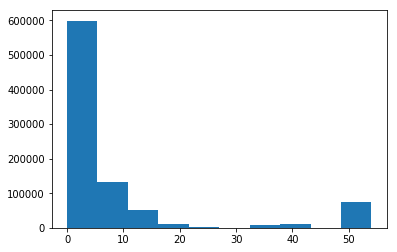

In [19]:
missing_rows.hist(grid = False)

In [20]:
# Write code to divide the data into two subsets based on the number of missing
# values in each row.
threshold = 30
data_missing_above_threshold = azdias[azdias.isnull().sum(axis = 1) >= threshold]
data_missing_below_threshold = azdias[azdias.isnull().sum(axis = 1)  < threshold]

print("number of records that have missing values that are above the threshold is: ", data_missing_above_threshold.shape[0])
print("Percentage: % {}".format(data_missing_above_threshold.shape[0] / azdias.shape[0] * 100))

number of records that have missing values that are above the threshold is:  93292
Percentage: % 10.46788619208928


In [21]:
# Compare the distribution of values for at least five columns where there are
# no or few missing values, between the two subsets.
no_missing_cols = azdias[azdias.columns[~azdias.isnull().any()]].columns.values
print(no_missing_cols.shape[0])
display(no_missing_cols)

24


array(['ANREDE_KZ', 'FINANZ_MINIMALIST', 'FINANZ_SPARER',
       'FINANZ_VORSORGER', 'FINANZ_ANLEGER', 'FINANZ_UNAUFFAELLIGER',
       'FINANZ_HAUSBAUER', 'FINANZTYP', 'GREEN_AVANTGARDE', 'SEMIO_SOZ',
       'SEMIO_FAM', 'SEMIO_REL', 'SEMIO_MAT', 'SEMIO_VERT', 'SEMIO_LUST',
       'SEMIO_ERL', 'SEMIO_KULT', 'SEMIO_RAT', 'SEMIO_KRIT', 'SEMIO_DOM',
       'SEMIO_KAEM', 'SEMIO_PFLICHT', 'SEMIO_TRADV', 'ZABEOTYP'], dtype=object)

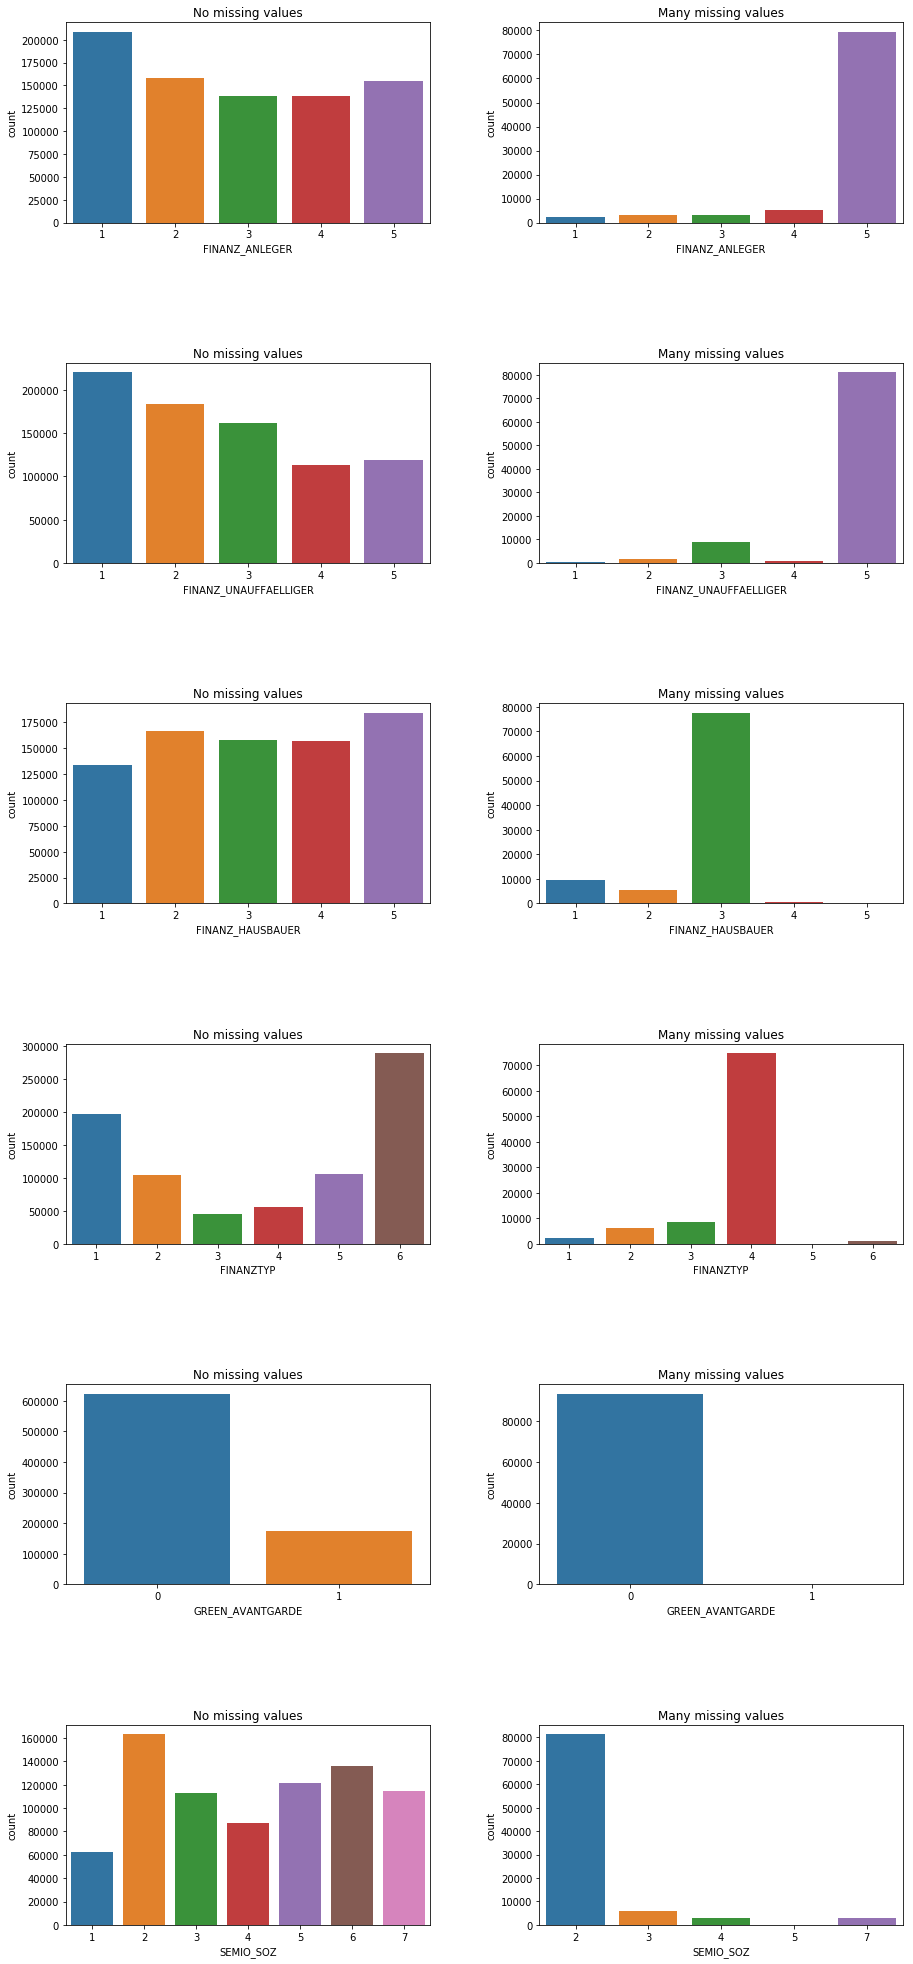

In [22]:
# Comprare variables.
cols_to_compare = no_missing_cols[4:10]
fig, axs = plt.subplots(nrows = len(cols_to_compare), ncols = 2, figsize = (15, 35))
fig.subplots_adjust(hspace = 0.7, wspace = 0.3)

for i in range(len(cols_to_compare)):
    sns.countplot(data_missing_below_threshold[cols_to_compare[i]], ax = axs[i][0])
    axs[i][0].set_title('No missing values')
    sns.countplot(data_missing_above_threshold[cols_to_compare[i]], ax = axs[i][1])
    axs[i][1].set_title('Many missing values')

#### Discussion 1.1.3: Assess Missing Data in Each Row

Data can also be separated around a threshold of around 20% of missing data in each column.
And as was shown, more than 10% of the data records contain empty/NaN values
We can advance in the dataset cleaning by simply filling the empty/missing values with zeros.

### Step 1.2: Select and Re-Encode Features

Checking for missing data isn't the only way in which you can prepare a dataset for analysis. Since the unsupervised learning techniques to be used will only work on data that is encoded numerically, you need to make a few encoding changes or additional assumptions to be able to make progress. In addition, while almost all of the values in the dataset are encoded using numbers, not all of them represent numeric values. Check the third column of the feature summary (`feat_info`) for a summary of types of measurement.
- For numeric and interval data, these features can be kept without changes.
- Most of the variables in the dataset are ordinal in nature. While ordinal values may technically be non-linear in spacing, make the simplifying assumption that the ordinal variables can be treated as being interval in nature (that is, kept without any changes).
- Special handling may be necessary for the remaining two variable types: categorical, and 'mixed'.

In the first two parts of this sub-step, you will perform an investigation of the categorical and mixed-type features and make a decision on each of them, whether you will keep, drop, or re-encode each. Then, in the last part, you will create a new data frame with only the selected and engineered columns.

Data wrangling is often the trickiest part of the data analysis process, and there's a lot of it to be done here. But stick with it: once you're done with this step, you'll be ready to get to the machine learning parts of the project!

In [23]:
# How many features are there of each data type?
features = list(data_missing_below_threshold.columns)

clean_feat_info = feat_info[feat_info['attribute'].isin(features)]
feature_type = pd.DataFrame(clean_feat_info['type'].value_counts())
display(feature_type)

,type
ordinal,49
categorical,21
mixed,7
numeric,7
interval,1


#### Step 1.2.1: Re-Encode Categorical Features

For categorical data, you would ordinarily need to encode the levels as dummy variables. Depending on the number of categories, perform one of the following:
- For binary (two-level) categoricals that take numeric values, you can keep them without needing to do anything.
- There is one binary variable that takes on non-numeric values. For this one, you need to re-encode the values as numbers or create a dummy variable.
- For multi-level categoricals (three or more values), you can choose to encode the values using multiple dummy variables (e.g. via [OneHotEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)), or (to keep things straightforward) just drop them from the analysis. As always, document your choices in the Discussion section.

In [24]:
# Assess categorical variables: which are binary, which are multi-level, and
# which one needs to be re-encoded?

categorical_cols = clean_feat_info[clean_feat_info.type == 'categorical']
display(categorical_cols)

,attribute,information_level,type,missing_or_unknown
0,AGER_TYP,person,categorical,"[-1,0]"
2,ANREDE_KZ,person,categorical,"[-1,0]"
3,CJT_GESAMTTYP,person,categorical,[0]
10,FINANZTYP,person,categorical,[-1]
12,GFK_URLAUBERTYP,person,categorical,[]
13,GREEN_AVANTGARDE,person,categorical,[]
17,LP_FAMILIE_FEIN,person,categorical,[0]
18,LP_FAMILIE_GROB,person,categorical,[0]
19,LP_STATUS_FEIN,person,categorical,[0]
20,LP_STATUS_GROB,person,categorical,[0]


In [25]:
# Separate multilevel variables and binary ones.

multilevel_variables = []
binary_variables = []
for col in categorical_cols.attribute.values:
    if data_missing_below_threshold[col].nunique() > 2:
        multilevel_variables.append(col)
    else:
        binary_variables.append(col)
        
display(binary_variables)

for v in binary_variables:
    print(data_missing_below_threshold[v].value_counts())

['ANREDE_KZ', 'GREEN_AVANTGARDE', 'SOHO_KZ', 'VERS_TYP', 'OST_WEST_KZ']

2    416094
1    381835
Name: ANREDE_KZ, dtype: int64
0    622715
1    175214
Name: GREEN_AVANTGARDE, dtype: int64
0.0    791213
1.0      6716
Name: SOHO_KZ, dtype: int64
2.0    394224
1.0    367042
Name: VERS_TYP, dtype: int64
W    629410
O    168519
Name: OST_WEST_KZ, dtype: int64


In [26]:
clean_dataset = data_missing_below_threshold.replace({'OST_WEST_KZ':{'W': 0, 'O': 1}})

In [27]:
clean_dataset.head()

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
1,NaN,1.0,2,5.0,1,5,2,5,4,5,...,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0
2,NaN,3.0,2,3.0,1,4,1,2,3,5,...,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0
3,2.0,4.0,2,2.0,4,2,5,2,1,2,...,2.0,2.0,2.0,0.0,1.0,3.0,4.0,2.0,3.0,3.0
4,NaN,3.0,1,5.0,4,3,4,1,3,2,...,2.0,4.0,2.0,1.0,2.0,3.0,3.0,4.0,6.0,5.0
5,3.0,1.0,2,2.0,3,1,5,2,2,5,...,2.0,3.0,1.0,1.0,1.0,5.0,5.0,2.0,3.0,3.0


In [28]:
clean_dataset = clean_dataset.drop(multilevel_variables, axis = 1)

In [29]:
clean_dataset.head()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GEBURTSJAHR,GREEN_AVANTGARDE,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
1,1.0,2,1,5,2,5,4,5,1996.0,0,...,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0
2,3.0,2,1,4,1,2,3,5,1979.0,1,...,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0
3,4.0,2,4,2,5,2,1,2,1957.0,0,...,2.0,2.0,2.0,0.0,1.0,3.0,4.0,2.0,3.0,3.0
4,3.0,1,4,3,4,1,3,2,1963.0,0,...,2.0,4.0,2.0,1.0,2.0,3.0,3.0,4.0,6.0,5.0
5,1.0,2,3,1,5,2,2,5,1943.0,0,...,2.0,3.0,1.0,1.0,1.0,5.0,5.0,2.0,3.0,3.0


#### Discussion 1.2.1: Re-Encode Categorical Features

Binary features that represent numeric values could be kept without the need to change anything other than filling the missing values using an imputing technique.
As of the multilevel features, I decided to re-encode the PRAEGENDE_JUGENDJAHRE and CAMEO_INTL_2015 multilevel features to MOVEMENT and DECADE features for PRAEGENDE_JUGENDJAHRE and LIFE_STAGE and WEALTH features, as specified in the Data_Dictionary markdown file.
Furthermore, I re-encoded the OST_WEST_KZ feature as it only contains two types of outputs to a binary digit, either 0 for 'W' or 1 for 'O'.
I then decided to drop the multilevel variables for the sake of simplicity, as I've done the hole project by getting dummy variables and one-hot-encode them, but the clustering took enormous time to train as the dimentionality was more than 200, and even with PCA giving around 80% accuracy and dropped more than 45% of the features, It still took a lot of time to compute.

#### Step 1.2.2: Engineer Mixed-Type Features

There are a handful of features that are marked as "mixed" in the feature summary that require special treatment in order to be included in the analysis. There are two in particular that deserve attention; the handling of the rest are up to your own choices:
- "PRAEGENDE_JUGENDJAHRE" combines information on three dimensions: generation by decade, movement (mainstream vs. avantgarde), and nation (east vs. west). While there aren't enough levels to disentangle east from west, you should create two new variables to capture the other two dimensions: an interval-type variable for decade, and a binary variable for movement.
- "CAMEO_INTL_2015" combines information on two axes: wealth and life stage. Break up the two-digit codes by their 'tens'-place and 'ones'-place digits into two new ordinal variables (which, for the purposes of this project, is equivalent to just treating them as their raw numeric values).
- If you decide to keep or engineer new features around the other mixed-type features, make sure you note your steps in the Discussion section.

Be sure to check `Data_Dictionary.md` for the details needed to finish these tasks.

In [30]:
# Re-encoding mappers.
decade_dict = {1:1, 2:1, 3:2, 4:2, 5:3, 6:3, 7:3, 8:4, 9:4, 10:5, 11:5, 12:5, 13:5, 14:6, 15:6}
def decade(x):
    return decade_dict.get(x, 0)

movement_dict = {1:1, 2:0, 3:1, 4:0, 5:1, 6:0, 7:0, 8:1, 9:0, 10:1, 11:0, 12:1, 13:0, 14:1, 15:0}
def movement(x):
    return movement_dict.get(x, 0)

wealth_dict = {'11':1, '12':1, '13':1, '14':1, '15':1, '21':2, '22':2, '23':2, '24':2, '25':2,
               '31':3, '32':3, '33':3, '34':3, '35':3, '41':4, '42':4, '43':4, '44':4, '45':4,
               '51':5, '52':5, '53':5, '54':5, '55':5}

stage_dict = {'11':1, '12':2, '13':3, '14':4, '15':5, '21':1, '22':2, '23':3, '24':4, '25':5,
                   '31':1, '32':2, '33':3, '34':4, '35':5, '41':1, '42':2, '43':3, '44':4, '45':5,
                   '51':1, '52':2, '53':3, '54':4, '55':5}

In [31]:
mixed = clean_feat_info[clean_feat_info.type == 'mixed']
mixed

,attribute,information_level,type,missing_or_unknown
15,LP_LEBENSPHASE_FEIN,person,mixed,[0]
16,LP_LEBENSPHASE_GROB,person,mixed,[0]
22,PRAEGENDE_JUGENDJAHRE,person,mixed,"[-1,0]"
56,WOHNLAGE,building,mixed,[-1]
59,CAMEO_INTL_2015,microcell_rr4,mixed,"[-1,XX]"
64,KBA05_BAUMAX,microcell_rr3,mixed,"[-1,0]"
79,PLZ8_BAUMAX,macrocell_plz8,mixed,"[-1,0]"


In [32]:
# Investigate "PRAEGENDE_JUGENDJAHRE" and engineer two new variables.

clean_dataset['DECADE'] = clean_dataset['PRAEGENDE_JUGENDJAHRE'].apply(decade)
clean_dataset['MOVEMENT'] = clean_dataset['PRAEGENDE_JUGENDJAHRE'].apply(movement)

In [33]:
clean_dataset.drop('PRAEGENDE_JUGENDJAHRE', axis=1, inplace=True)

In [34]:
# Investigate "CAMEO_INTL_2015" and engineer two new variables.

clean_dataset['WEALTH'] = clean_dataset['CAMEO_INTL_2015']
clean_dataset['LIFE_STAGE'] = clean_dataset['CAMEO_INTL_2015']

In [35]:
clean_dataset['WEALTH'].replace(wealth_dict, inplace=True)
clean_dataset['LIFE_STAGE'].replace(stage_dict, inplace=True)

In [36]:
clean_dataset.drop('CAMEO_INTL_2015', axis=1, inplace=True)

In [37]:
# data_missing_below_threshold.columns.values
mixed_features = clean_feat_info[clean_feat_info["type"] == "mixed"]["attribute"]
for mixed_f in mixed_features:
    if mixed_f in clean_dataset.columns.values:
        clean_dataset.drop(mixed_f, axis=1, inplace=True)
        
clean_dataset.drop(['GEBURTSJAHR', 'ALTER_HH'], axis = 1, inplace = True)

In [38]:
clean_dataset.head()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,...,PLZ8_ANTG4,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB,DECADE,MOVEMENT,WEALTH,LIFE_STAGE
1,1.0,2,1,5,2,5,4,5,0,3.0,...,1.0,5.0,4.0,3.0,5.0,4.0,6,1,5.0,1.0
2,3.0,2,1,4,1,2,3,5,1,3.0,...,0.0,4.0,4.0,3.0,5.0,2.0,6,0,2.0,4.0
3,4.0,2,4,2,5,2,1,2,0,2.0,...,0.0,3.0,4.0,2.0,3.0,3.0,4,1,1.0,2.0
4,3.0,1,4,3,4,1,3,2,0,3.0,...,1.0,3.0,3.0,4.0,6.0,5.0,4,1,4.0,3.0
5,1.0,2,3,1,5,2,2,5,0,3.0,...,1.0,5.0,5.0,2.0,3.0,3.0,2,1,5.0,4.0


#### Discussion 1.2.2: Engineer Mixed-Type Features
As provided in the Data_Dictionary.md file that contains the explanition of the dataset and its features:
###### PRAEGENDE_JUGENDJAHRE
Dominating movement of person's youth (avantgarde vs. mainstream; east vs. west)
- -1: unknown
-  0: unknown
-  1: 40s - war years (Mainstream, E+W)
-  2: 40s - reconstruction years (Avantgarde, E+W)
-  3: 50s - economic miracle (Mainstream, E+W)
-  4: 50s - milk bar / Individualisation (Avantgarde, E+W)
-  5: 60s - economic miracle (Mainstream, E+W)
-  6: 60s - generation 68 / student protestors (Avantgarde, W)
-  7: 60s - opponents to the building of the Wall (Avantgarde, E)
-  8: 70s - family orientation (Mainstream, E+W)
-  9: 70s - peace movement (Avantgarde, E+W)
- 10: 80s - Generation Golf (Mainstream, W)
- 11: 80s - ecological awareness (Avantgarde, W)
- 12: 80s - FDJ / communist party youth organisation (Mainstream, E)
- 13: 80s - Swords into ploughshares (Avantgarde, E)
- 14: 90s - digital media kids (Mainstream, E+W)
- 15: 90s - ecological awareness (Avantgarde, E+W)

There are two categories regarding feature, Movement and decade
Mainstream or Avantgrade for movement
and the decades.
Those are separated into to columns and the original column is dropped from the dataframe.

The same is applied to the CAMEO_INTL_2015 feature, which is discibed as following in the Data_Dictionary.md file:
##### 4.3. CAMEO_INTL_2015
German CAMEO: Wealth / Life Stage Typology, mapped to international code
- -1: unknown
- 11: Wealthy Households - Pre-Family Couples & Singles
- 12: Wealthy Households - Young Couples With Children
- 13: Wealthy Households - Families With School Age Children
- 14: Wealthy Households - Older Families &  Mature Couples
- 15: Wealthy Households - Elders In Retirement
- 21: Prosperous Households - Pre-Family Couples & Singles
- 22: Prosperous Households - Young Couples With Children
- 23: Prosperous Households - Families With School Age Children
- 24: Prosperous Households - Older Families & Mature Couples
- 25: Prosperous Households - Elders In Retirement
- 31: Comfortable Households - Pre-Family Couples & Singles
- 32: Comfortable Households - Young Couples With Children
- 33: Comfortable Households - Families With School Age Children
- 34: Comfortable Households - Older Families & Mature Couples
- 35: Comfortable Households - Elders In Retirement
- 41: Less Affluent Households - Pre-Family Couples & Singles
- 42: Less Affluent Households - Young Couples With Children
- 43: Less Affluent Households - Families With School Age Children
- 44: Less Affluent Households - Older Families & Mature Couples
- 45: Less Affluent Households - Elders In Retirement
- 51: Poorer Households - Pre-Family Couples & Singles
- 52: Poorer Households - Young Couples With Children
- 53: Poorer Households - Families With School Age Children
- 54: Poorer Households - Older Families & Mature Couples
- 55: Poorer Households - Elders In Retirement
- XX: unknown

It describes Life Stage and wealth which can also be separated into two columns, and the original column is dropped thereafter.
It was separated into CAMEO_INTL_2015_WEALTH and CAMEO_INTL_2015_LIFE_STAGE.

#### Step 1.2.3: Complete Feature Selection

In order to finish this step up, you need to make sure that your data frame now only has the columns that you want to keep. To summarize, the dataframe should consist of the following:
- All numeric, interval, and ordinal type columns from the original dataset.
- Binary categorical features (all numerically-encoded).
- Engineered features from other multi-level categorical features and mixed features.

Make sure that for any new columns that you have engineered, that you've excluded the original columns from the final dataset. Otherwise, their values will interfere with the analysis later on the project. For example, you should not keep "PRAEGENDE_JUGENDJAHRE", since its values won't be useful for the algorithm: only the values derived from it in the engineered features you created should be retained. As a reminder, your data should only be from **the subset with few or no missing values**.

### Step 1.3: Create a Cleaning Function

Even though you've finished cleaning up the general population demographics data, it's important to look ahead to the future and realize that you'll need to perform the same cleaning steps on the customer demographics data. In this substep, complete the function below to execute the main feature selection, encoding, and re-engineering steps you performed above. Then, when it comes to looking at the customer data in Step 3, you can just run this function on that DataFrame to get the trimmed dataset in a single step.

In [39]:
def clean_data(df):
    """
    Perform feature trimming, re-encoding, and engineering for demographics
    data
    
    INPUT: Demographics DataFrame
    OUTPUT: Trimmed and cleaned demographics DataFrame
    """
    for i in range(len(feat_info)):
        missing = feat_info.iloc[i]['missing_or_unknown']
        missing = missing.strip('[')
        missing = missing.strip(']')
        missing = missing.split(sep = ',')
        missing = [int(v) if (v != 'X' and v != 'XX' and v != '') else v for v in missing]
        if missing != ['']:
            df_clean = df.replace({feat_info.iloc[i]['attribute']: missing}, np.nan)

    for col in df.columns:
        df_clean = df_clean.replace({col: ['XX', 'X']}, np.nan)
    
    df_clean.drop(cols_to_drop, axis = 1, inplace = True)

    threshold = 30
    df_clean = df_clean[df_clean.isnull().sum(axis = 1) < threshold]

    df_clean = df_clean.replace({'OST_WEST_KZ':{'W': 0, 'O': 1}})

    for multi_feature in multilevel_variables:
        if multi_feature in df_clean.columns.values:
            print(multi_feature)
            df_clean.drop(multi_feature, axis = 1, inplace = True)

    df_clean['DECADE'] = df_clean['PRAEGENDE_JUGENDJAHRE'].apply(decade)
    df_clean['MOVEMENT'] = df_clean['PRAEGENDE_JUGENDJAHRE'].apply(movement)
    
    df_clean['WEALTH'] = df_clean['CAMEO_INTL_2015']
    df_clean['LIFE_STAGE'] = df_clean['CAMEO_INTL_2015']
    
    df_clean['WEALTH'].replace(wealth_dict, inplace = True)
    df_clean['LIFE_STAGE'].replace(stage_dict, inplace = True)

    for mixed_f in mixed_features:
        if mixed_f in df_clean.columns.values:
            df_clean.drop(mixed_f, axis = 1, inplace = True)
    
    return df_clean

In [40]:
# aaa = clean_data(azdias)

## Step 2: Feature Transformation

### Step 2.1: Apply Feature Scaling

Before we apply dimensionality reduction techniques to the data, we need to perform feature scaling so that the principal component vectors are not influenced by the natural differences in scale for features. Starting from this part of the project, you'll want to keep an eye on the [API reference page for sklearn](http://scikit-learn.org/stable/modules/classes.html) to help you navigate to all of the classes and functions that you'll need. In this substep, you'll need to check the following:

- sklearn requires that data not have missing values in order for its estimators to work properly. So, before applying the scaler to your data, make sure that you've cleaned the DataFrame of the remaining missing values. This can be as simple as just removing all data points with missing data, or applying an [Imputer](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Imputer.html) to replace all missing values. You might also try a more complicated procedure where you temporarily remove missing values in order to compute the scaling parameters before re-introducing those missing values and applying imputation. Think about how much missing data you have and what possible effects each approach might have on your analysis, and justify your decision in the discussion section below.
- For the actual scaling function, a [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) instance is suggested, scaling each feature to mean 0 and standard deviation 1.
- For these classes, you can make use of the `.fit_transform()` method to both fit a procedure to the data as well as apply the transformation to the data at the same time. Don't forget to keep the fit sklearn objects handy, since you'll be applying them to the customer demographics data towards the end of the project.

In [41]:
# If you've not yet cleaned the dataset of all NaN values, then investigate and
# do that now.

from sklearn.preprocessing import Imputer
filler = Imputer(strategy = 'most_frequent')
clean_dataset = pd.DataFrame(filler.fit_transform(clean_dataset), columns = list(clean_dataset))

display(clean_dataset)

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,...,PLZ8_ANTG4,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB,DECADE,MOVEMENT,WEALTH,LIFE_STAGE
0,1.0,2.0,1.0,5.0,2.0,5.0,4.0,5.0,0.0,3.0,...,1.0,5.0,4.0,3.0,5.0,4.0,6.0,1.0,5.0,1.0
1,3.0,2.0,1.0,4.0,1.0,2.0,3.0,5.0,1.0,3.0,...,0.0,4.0,4.0,3.0,5.0,2.0,6.0,0.0,2.0,4.0
2,4.0,2.0,4.0,2.0,5.0,2.0,1.0,2.0,0.0,2.0,...,0.0,3.0,4.0,2.0,3.0,3.0,4.0,1.0,1.0,2.0
3,3.0,1.0,4.0,3.0,4.0,1.0,3.0,2.0,0.0,3.0,...,1.0,3.0,3.0,4.0,6.0,5.0,4.0,1.0,4.0,3.0
4,1.0,2.0,3.0,1.0,5.0,2.0,2.0,5.0,0.0,3.0,...,1.0,5.0,5.0,2.0,3.0,3.0,2.0,1.0,5.0,4.0
5,2.0,2.0,1.0,5.0,1.0,5.0,4.0,3.0,0.0,2.0,...,0.0,5.0,5.0,4.0,6.0,3.0,5.0,1.0,2.0,2.0
6,1.0,1.0,3.0,3.0,4.0,1.0,3.0,2.0,0.0,1.0,...,0.0,4.0,4.0,2.0,5.0,2.0,4.0,1.0,1.0,4.0
7,3.0,1.0,4.0,4.0,2.0,4.0,2.0,2.0,1.0,3.0,...,1.0,3.0,3.0,2.0,4.0,3.0,5.0,0.0,1.0,3.0
8,3.0,2.0,2.0,4.0,2.0,3.0,5.0,4.0,1.0,2.0,...,1.0,3.0,3.0,2.0,3.0,1.0,6.0,0.0,1.0,5.0
9,3.0,2.0,2.0,2.0,5.0,3.0,1.0,5.0,0.0,2.0,...,0.0,3.0,3.0,4.0,6.0,5.0,2.0,1.0,5.0,1.0


In [42]:
# Apply feature scaling to the general population demographics data.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
clean_dataset = pd.DataFrame(scaler.fit_transform(clean_dataset), columns = list(clean_dataset))

In [43]:
clean_dataset.head()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,...,PLZ8_ANTG4,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB,DECADE,MOVEMENT,WEALTH,LIFE_STAGE
0,-1.766589,0.957948,-1.494642,1.538012,-1.040689,1.466098,0.958887,1.339214,-0.530444,1.010204,...,0.442368,1.455672,0.574210,-0.171430,-0.127065,0.684857,1.110302,0.585865,1.175791,-1.249068
1,0.200538,0.957948,-1.494642,0.864643,-1.766953,-0.570929,0.244313,1.339214,1.885212,1.010204,...,-0.934943,0.419618,0.574210,-0.171430,-0.127065,-0.789040,1.110302,-1.706878,-0.869587,0.766977
2,1.184101,0.957948,0.683124,-0.482094,1.138104,-0.570929,-1.184835,-0.791360,-0.530444,-0.311785,...,-0.934943,-0.616435,0.574210,-1.173173,-0.997586,-0.052092,-0.107302,0.585865,-1.551380,-0.577053
3,0.200538,-1.043898,0.683124,0.191275,0.411839,-1.249938,0.244313,-0.791360,-0.530444,1.010204,...,0.442368,-0.616435,-0.337224,0.830313,0.308196,1.421806,-0.107302,0.585865,0.493999,0.094962
4,-1.766589,0.957948,-0.042798,-1.155462,1.138104,-0.570929,-0.470261,1.339214,-0.530444,1.010204,...,0.442368,1.455672,1.485644,-1.173173,-0.997586,-0.052092,-1.324906,0.585865,1.175791,0.766977


### Discussion 2.1: Apply Feature Scaling

I used an Imputer with a strategy of `most_frequent` to fill the empty data with the most occurring output in the rows, and then applied feature scaling using `scikit learn`'s `StandardScaler`.

### Step 2.2: Perform Dimensionality Reduction

On your scaled data, you are now ready to apply dimensionality reduction techniques.

- Use sklearn's [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) class to apply principal component analysis on the data, thus finding the vectors of maximal variance in the data. To start, you should not set any parameters (so all components are computed) or set a number of components that is at least half the number of features (so there's enough features to see the general trend in variability).
- Check out the ratio of variance explained by each principal component as well as the cumulative variance explained. Try plotting the cumulative or sequential values using matplotlib's [`plot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html) function. Based on what you find, select a value for the number of transformed features you'll retain for the clustering part of the project.
- Once you've made a choice for the number of components to keep, make sure you re-fit a PCA instance to perform the decided-on transformation.

In [44]:
# Apply PCA to the data.
from sklearn.decomposition import PCA
pca_object = PCA()
pca_object.fit(clean_dataset)


PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

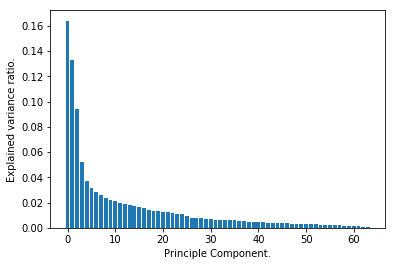

In [45]:
# Investigate the variance accounted for by each principal component.
plt.bar(np.arange(len(pca_object.explained_variance_ratio_)), pca_object.explained_variance_ratio_)
plt.xlabel('Principle Component.')
plt.ylabel('Explained variance ratio.')

plt.show()

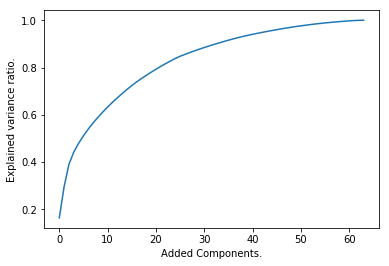

In [46]:
# print the accumulative variance of the principle components.
plt.plot(range(len(pca_object.explained_variance_ratio_)), np.cumsum(pca_object.explained_variance_ratio_), '-')
plt.xlabel('Added Components.')
plt.ylabel('Explained variance ratio.')
plt.show()

In [47]:
# Re-apply PCA to the data while selecting for number of components to retain.
pca30 = PCA(n_components = 30)
data_pca30 = pca30.fit_transform(clean_dataset)

Text(0,0.5,'Explained variance ratio.')

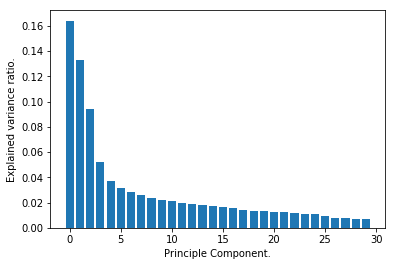

In [48]:
plt.bar(np.arange(len(pca30.explained_variance_ratio_)), pca30.explained_variance_ratio_)
plt.xlabel('Principle Component.')
plt.ylabel('Explained variance ratio.')

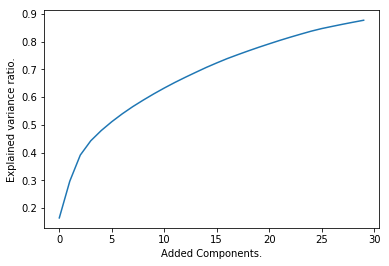

In [49]:
plt.plot(range(len(pca30.explained_variance_ratio_)),np.cumsum(pca30.explained_variance_ratio_), '-')
plt.xlabel('Added Components.')
plt.ylabel('Explained variance ratio.')
plt.show()

## Step 3: Clustering

### Step 3.1: Apply Clustering to General Population

You've assessed and cleaned the demographics data, then scaled and transformed them. Now, it's time to see how the data clusters in the principal components space. In this substep, you will apply k-means clustering to the dataset and use the average within-cluster distances from each point to their assigned cluster's centroid to decide on a number of clusters to keep.

- Use sklearn's [KMeans](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans) class to perform k-means clustering on the PCA-transformed data.
- Then, compute the average difference from each point to its assigned cluster's center. **Hint**: The KMeans object's `.score()` method might be useful here, but note that in sklearn, scores tend to be defined so that larger is better. Try applying it to a small, toy dataset, or use an internet search to help your understanding.
- Perform the above two steps for a number of different cluster counts. You can then see how the average distance decreases with an increasing number of clusters. However, each additional cluster provides a smaller net benefit. Use this fact to select a final number of clusters in which to group the data. **Warning**: because of the large size of the dataset, it can take a long time for the algorithm to resolve. The more clusters to fit, the longer the algorithm will take. You should test for cluster counts through at least 10 clusters to get the full picture, but you shouldn't need to test for a number of clusters above about 30.
- Once you've selected a final number of clusters to use, re-fit a KMeans instance to perform the clustering operation. Make sure that you also obtain the cluster assignments for the general demographics data, since you'll be using them in the final Step 3.3.

In [54]:
def clustering_score(df, n):
    k_means = KMeans(n_clusters = n)
    model = k_means.fit(df)
    s = np.abs(model.score(df))
    return s

In [55]:
from sklearn.cluster import KMeans
scores = []
for i in range(1, 20):
    t = clustering_score(data_pca30, i)
    print('Epoch {}'.format(i))
    scores.append(t)

Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19


Text(0,0.5,'Error')

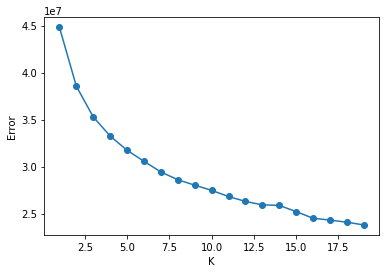

In [56]:
# Investigate the change in within-cluster distance across number of clusters.
# HINT: Use matplotlib's plot function to visualize this relationship.

plt.plot(range(1, 20), scores, linestyle = '-', marker = 'o')
plt.xlabel('K')
plt.ylabel('Error')

In [57]:
# Re-fit the k-means model with the selected number of clusters and obtain
# cluster predictions for the general population demographics data.
k_means = KMeans(n_clusters = 14)
model = k_means.fit(data_pca30)

In [58]:
azdias_predictions = model.predict(data_pca30)

### Discussion 3.1: Apply Clustering to General Population
From the plot, and using the so-called Elbow Method, I will emperically choose 14 as the number of clusters to use on the data because the the error attenuation afterwards is not so significant.

### Step 3.2: Apply All Steps to the Customer Data

Now that you have clusters and cluster centers for the general population, it's time to see how the customer data maps on to those clusters. Take care to not confuse this for re-fitting all of the models to the customer data. Instead, you're going to use the fits from the general population to clean, transform, and cluster the customer data. In the last step of the project, you will interpret how the general population fits apply to the customer data.

- Don't forget when loading in the customers data, that it is semicolon (`;`) delimited.
- Apply the same feature wrangling, selection, and engineering steps to the customer demographics using the `clean_data()` function you created earlier. (You can assume that the customer demographics data has similar meaning behind missing data patterns as the general demographics data.)
- Use the sklearn objects from the general demographics data, and apply their transformations to the customers data. That is, you should not be using a `.fit()` or `.fit_transform()` method to re-fit the old objects, nor should you be creating new sklearn objects! Carry the data through the feature scaling, PCA, and clustering steps, obtaining cluster assignments for all of the data in the customer demographics data.

In [59]:
# Load in the customer demographics data.
customers = pd.read_csv('Udacity_CUSTOMERS_Subset.csv', sep = ';')

In [60]:
customers = clean_data(customers)

CJT_GESAMTTYP
FINANZTYP
GFK_URLAUBERTYP
LP_FAMILIE_FEIN
LP_FAMILIE_GROB
LP_STATUS_FEIN
LP_STATUS_GROB
NATIONALITAET_KZ
SHOPPER_TYP
ZABEOTYP
GEBAEUDETYP
CAMEO_DEUG_2015
CAMEO_DEU_2015


In [61]:
customers.head()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,...,PLZ8_ANTG4,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB,DECADE,MOVEMENT,WEALTH,LIFE_STAGE
0,4,1,5,1,5,1,2,2,1,1,...,0.0,5.0,5.0,1.0,2.0,1.0,2,0,1.0,3.0
2,4,2,5,1,5,1,4,4,1,2,...,1.0,3.0,2.0,3.0,5.0,3.0,2,0,3.0,4.0
3,4,1,5,1,5,2,1,2,0,2,...,0.0,3.0,4.0,1.0,3.0,1.0,1,1,2.0,4.0
4,3,1,3,1,4,4,5,2,0,3,...,1.0,3.0,3.0,3.0,5.0,1.0,4,1,4.0,1.0
5,3,1,5,1,5,1,2,3,1,3,...,1.0,5.0,5.0,3.0,7.0,5.0,2,0,3.0,4.0


In [63]:
# Impute/Fill-in the data.
customers_filled_data = pd.DataFrame(filler.transform(customers))
customers_filled_data.columns = customers.columns
customers_filled_data.index = customers.index

In [64]:
# Properly Scale the data.
customers_clean_data = pd.DataFrame(scaler.transform(customers_filled_data), columns=list(customers_filled_data))

In [65]:
display(customers_clean_data)

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,...,PLZ8_ANTG4,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB,DECADE,MOVEMENT,WEALTH,LIFE_STAGE
0,1.184101,-1.043898,1.409046,-1.155462,1.138104,-1.249938,-0.470261,-0.791360,1.885212,-1.633775,...,-0.934943,1.455672,1.485644,-2.174916,-1.432846,-1.525989,-1.324906,-1.706878,-1.551380,0.094962
1,1.184101,0.957948,1.409046,-1.155462,1.138104,-1.249938,0.958887,0.629023,1.885212,-0.311785,...,0.442368,-0.616435,-1.248658,-0.171430,-0.127065,-0.052092,-1.324906,-1.706878,-0.187794,0.766977
2,1.184101,-1.043898,1.409046,-1.155462,1.138104,-0.570929,-1.184835,-0.791360,-0.530444,-0.311785,...,-0.934943,-0.616435,0.574210,-2.174916,-0.997586,-1.525989,-1.933708,0.585865,-0.869587,0.766977
3,0.200538,-1.043898,-0.042798,-1.155462,0.411839,0.787089,1.673461,-0.791360,-0.530444,1.010204,...,0.442368,-0.616435,-0.337224,-0.171430,-0.127065,-1.525989,-0.107302,0.585865,0.493999,-1.249068
4,0.200538,-1.043898,1.409046,-1.155462,1.138104,-1.249938,-0.470261,-0.081168,1.885212,1.010204,...,0.442368,1.455672,1.485644,-0.171430,0.743456,1.421806,-1.324906,-1.706878,-0.187794,0.766977
5,1.184101,-1.043898,1.409046,-1.155462,1.138104,-1.249938,-1.184835,-0.791360,1.885212,-0.311785,...,-0.934943,1.455672,1.485644,-1.173173,-0.997586,-0.789040,-1.324906,-1.706878,-0.869587,0.094962
6,1.184101,-1.043898,1.409046,-1.155462,1.138104,-1.249938,-0.470261,-0.791360,1.885212,-1.633775,...,0.442368,-0.616435,-0.337224,-0.171430,-0.562325,-0.052092,-1.324906,-1.706878,-1.551380,1.438992
7,1.184101,0.957948,-0.768720,-0.482094,1.138104,-1.249938,-1.184835,1.339214,-0.530444,-0.311785,...,0.442368,1.455672,0.574210,-0.171430,1.178717,-0.052092,-1.933708,0.585865,1.175791,1.438992
8,0.200538,-1.043898,1.409046,-0.482094,0.411839,-1.249938,0.244313,-1.501551,1.885212,1.010204,...,-0.934943,1.455672,1.485644,-0.171430,0.308196,0.684857,-0.107302,-1.706878,-1.551380,1.438992
9,1.184101,-1.043898,1.409046,-1.155462,1.138104,-1.249938,0.244313,-0.791360,1.885212,-1.633775,...,-0.934943,-0.616435,-0.337224,-1.173173,-0.127065,-1.525989,-1.324906,-1.706878,-1.551380,0.766977


In [66]:
# Run PCA on the Imputed/Scaled data.
customers_data_pca = pca30.fit_transform(customers_clean_data)

In [67]:
model

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=14, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [68]:
customers_predictions = model.predict(customers_data_pca)

### Step 3.3: Compare Customer Data to Demographics Data

At this point, you have clustered data based on demographics of the general population of Germany, and seen how the customer data for a mail-order sales company maps onto those demographic clusters. In this final substep, you will compare the two cluster distributions to see where the strongest customer base for the company is.

Consider the proportion of persons in each cluster for the general population, and the proportions for the customers. If we think the company's customer base to be universal, then the cluster assignment proportions should be fairly similar between the two. If there are only particular segments of the population that are interested in the company's products, then we should see a mismatch from one to the other. If there is a higher proportion of persons in a cluster for the customer data compared to the general population (e.g. 5% of persons are assigned to a cluster for the general population, but 15% of the customer data is closest to that cluster's centroid) then that suggests the people in that cluster to be a target audience for the company. On the other hand, the proportion of the data in a cluster being larger in the general population than the customer data (e.g. only 2% of customers closest to a population centroid that captures 6% of the data) suggests that group of persons to be outside of the target demographics.

Take a look at the following points in this step:

- Compute the proportion of data points in each cluster for the general population and the customer data. Visualizations will be useful here: both for the individual dataset proportions, but also to visualize the ratios in cluster representation between groups. Seaborn's [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html) or [`barplot()`](https://seaborn.pydata.org/generated/seaborn.barplot.html) function could be handy.
  - Recall the analysis you performed in step 1.1.3 of the project, where you separated out certain data points from the dataset if they had more than a specified threshold of missing values. If you found that this group was qualitatively different from the main bulk of the data, you should treat this as an additional data cluster in this analysis. Make sure that you account for the number of data points in this subset, for both the general population and customer datasets, when making your computations!
- Which cluster or clusters are overrepresented in the customer dataset compared to the general population? Select at least one such cluster and infer what kind of people might be represented by that cluster. Use the principal component interpretations from step 2.3 or look at additional components to help you make this inference. Alternatively, you can use the `.inverse_transform()` method of the PCA and StandardScaler objects to transform centroids back to the original data space and interpret the retrieved values directly.
- Perform a similar investigation for the underrepresented clusters. Which cluster or clusters are underrepresented in the customer dataset compared to the general population, and what kinds of people are typified by these clusters?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f001759f320>]], dtype=object)

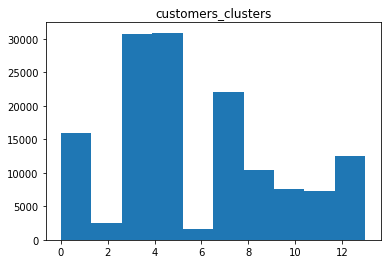

In [69]:
# Compare the proportion of data in each cluster for the customer data to the
# proportion of data in each cluster for the general population.

# Customers Clusters.
pd.DataFrame(customers_predictions, columns = ['customers_clusters']).hist(grid = False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f00175f58d0>]], dtype=object)

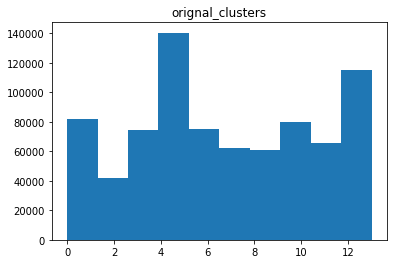

In [70]:
# Original data clusters.
pd.DataFrame(azdias_predictions, columns = ['orignal_clusters']).hist(grid = False)

Text(0.5,1,'Original data Clusters')

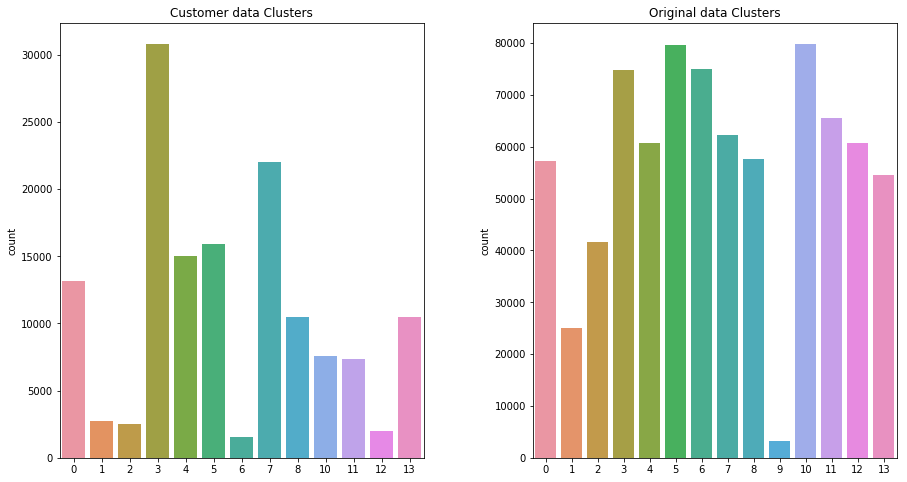

In [71]:
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (15,8))
fig.subplots_adjust(hspace = 1, wspace= 0.3)

sns.countplot(customers_predictions, ax=axs[0])
axs[0].set_title('Customer data Clusters')
sns.countplot(azdias_predictions, ax=axs[1])
axs[1].set_title('Original data Clusters')

In [78]:
# What kinds of people are part of a cluster that is overrepresented in the
# customer data compared to the general population?
c3 = scaler.inverse_transform(pca30.inverse_transform(model.cluster_centers_[3]))

In [79]:
c3_s = pd.Series(data = c3, index = customers.columns)

In [80]:
c3_s

ALTERSKATEGORIE_GROB        3.739817
ANREDE_KZ                   0.796880
FINANZ_MINIMALIST           5.387687
FINANZ_SPARER               1.148875
FINANZ_VORSORGER            4.778549
FINANZ_ANLEGER              0.964590
FINANZ_UNAUFFAELLIGER       1.888109
FINANZ_HAUSBAUER            1.616756
GREEN_AVANTGARDE            1.018114
HEALTH_TYP                  1.590610
RETOURTYP_BK_S              4.033131
SEMIO_SOZ                   5.070564
SEMIO_FAM                   5.052220
SEMIO_REL                   3.888717
SEMIO_MAT                   4.850084
SEMIO_VERT                  7.215993
SEMIO_LUST                  5.915390
SEMIO_ERL                   3.210188
SEMIO_KULT                  5.395039
SEMIO_RAT                   2.168343
SEMIO_KRIT                  2.139293
SEMIO_DOM                   2.552082
SEMIO_KAEM                  1.397226
SEMIO_PFLICHT               2.624646
SEMIO_TRADV                 3.006579
SOHO_KZ                     0.025157
VERS_TYP                    1.371783
A

In [84]:
# What kinds of people are part of a cluster that is underrepresented in the
# customer data compared to the general population?
c10 = scaler.inverse_transform(pca30.inverse_transform(model.cluster_centers_[10]))

In [85]:
c10_s = pd.Series(data = c10, index = customers.columns)

In [86]:
c10_s

ALTERSKATEGORIE_GROB        3.518726
ANREDE_KZ                   1.655963
FINANZ_MINIMALIST           4.047068
FINANZ_SPARER               1.387962
FINANZ_VORSORGER            4.619824
FINANZ_ANLEGER              1.645071
FINANZ_UNAUFFAELLIGER       1.882947
FINANZ_HAUSBAUER            3.001370
GREEN_AVANTGARDE            0.681941
HEALTH_TYP                  2.075997
RETOURTYP_BK_S              4.188006
SEMIO_SOZ                   3.558105
SEMIO_FAM                   2.889059
SEMIO_REL                   2.395136
SEMIO_MAT                   2.851955
SEMIO_VERT                  4.065686
SEMIO_LUST                  5.642153
SEMIO_ERL                   5.834634
SEMIO_KULT                  2.799961
SEMIO_RAT                   3.017330
SEMIO_KRIT                  4.942120
SEMIO_DOM                   5.080365
SEMIO_KAEM                  4.878082
SEMIO_PFLICHT               2.908261
SEMIO_TRADV                 2.531950
SOHO_KZ                    -0.020929
VERS_TYP                    1.584102
A

_Clutser 3_: The overrepresented cluster in the customer data is characterized by:
> 1. Wealth = 1.64, which indicates Prosperous or Comfortable households
> 2. Life Stage = 3.827, which indicates life stage of Families With School Age Children or Older Families & Mature Couples
> 3. SEMIO_VERT = 7.2, which indicated dreamful mindset.


In contrast, _Cluster 10_:  The underrepresented cluster in the customer data is characterized by:
> 1. Wealth = 2.92, which indicates Less Affluent or Poorer households
> 2. Life Stage = 3.32,  which indicates life stage of Pre-Family Couples & Singles or Young Couples With Children
> 3. REGIOTYP = 4.5, which indicates middle to lower middle class of neighborhood typology.